![image-2.png](attachment:image-2.png)
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad grupal: Explorando patrones ocultos: Detección de Anomalías en datos
## Objetivos

Mediante este trabajo se pretende que ponga en práctica la aplicación de las técnicas de detección de anomalías. El objetivo es analizar si existen anomalías en el conjunto de datos aplicando técnicas univariantes y multivariantes. Debe detallar los pasos que hay que realizar para detección de valores inusuales.

- 	Entender los métodos media móvil, z-score, Isolation Forest y Local Outlier Factor
- 	Implementar el código para cada una de estas técnicas y analizar si existen o no anomalía
- 
	Investigar sobre una técnica de detección de anomalías con un caso de uso concreto.

Descripción de la actividad

Debes realizar la actividad en el Notebook adjunto. Debes ir completando el código solicitado, así como responder a las preguntas que se van realizando.

Tareas que
- alizar
	Detección de 
- malías.
	Debes completar el código pedido en este notebook y contestar las pregunt
- finales.
	Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de detección de anomalías. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de De
- Learning.
	Para cada artí
- O indicar:
o	Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección
-  anomalías.
o	Técnicas de detección de anoma
- s empleadas.
o	Principales resultados de la aplicación y de la investigación.


#### Integrantes del grupo

In [2]:
# Coloca en este espacio el nombre de los integrantes del grupo

## Detección de anomalías

Los transformadores juegan un papel muy importante en el sistema eléctrico. Aunque son algunos de los componentes más confiables de la red eléctrica, también son propensos a fallar debido a muchos factores, tanto internos como externos. Podría haber muchos iniciadores que causen una falla en el transformador, pero los que potencialmente pueden conducir a una falla catastrófica son los siguientes:
Falla mecánica
Falla dieléctrica

Contenido
Estos datos se recopilaron a través de dispositivos IoT desde el 25 de junio de 2019 hasta el 14 de abril de 2020 y se actualizaron cada 15 minutos.
El dataset contiene 19352 registros.
Descripción de los parámetros:
Voltaje de corriente:
1. VL1- Fase Línea 1
2. VL2- Fase Línea 2
3. VL3- Fase Línea 3
4. IL1- Línea actual 1
5. IL2- Línea actual 2
6. IL3- Línea actual 3
7. VL12- Línea de tensión 1 2
8. VL23- Línea de tensión 2 3
9. VL31- Línea de tensión 3 1
10. INUT-Corriente neutra

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# se carga el dataset, con separados ;, se transforman las dos columnas Date y Time a una única columna con tipo datetime
# en el fichero CSV existen NaN identificados por ?
df = pd.read_csv('CurrentVoltage.csv', sep=',') 

#### ¿Cuántas instancias tiene el dataset?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19352 entries, 0 to 19351
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DeviceTimeStamp  19352 non-null  object 
 1   VL1              19352 non-null  float64
 2   VL2              19352 non-null  float64
 3   VL3              19352 non-null  float64
 4   IL1              19352 non-null  float64
 5   IL2              19352 non-null  float64
 6   IL3              19352 non-null  float64
 7   VL12             19352 non-null  float64
 8   VL23             19352 non-null  float64
 9   VL31             19352 non-null  float64
 10  INUT             19352 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


### El dataset contiene 19352 instancias.

#### ¿Cuál es el tipo de datos predominante en las variables?

### El tipo de datos predominante es float64.

## Variables nulas

#### ¿Tiene este dataset datos faltantes?

In [6]:
print(df.isnull().any())

DeviceTimeStamp    False
VL1                False
VL2                False
VL3                False
IL1                False
IL2                False
IL3                False
VL12               False
VL23               False
VL31               False
INUT               False
dtype: bool


### Este dataset no presenta datos faltantes.

#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

In [7]:
df.describe()

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
count,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.00000,19352.000000,19352.000000,19352.000000
mean,241.068019,240.515456,239.912293,73.710857,58.970592,83.226555,379.47530,378.526261,379.969311,26.315187
std,9.536380,9.801129,8.846213,41.256800,40.463867,43.609360,119.96308,119.417113,120.074752,15.103268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,235.400000,235.100000,235.100000,46.775000,31.500000,56.300000,400.70000,401.300000,401.900000,16.800000
50%,242.700000,242.100000,241.100000,69.500000,50.200000,80.200000,417.80000,416.300000,417.900000,25.600000
75%,247.500000,246.700000,245.300000,100.100000,82.500000,113.900000,427.50000,425.300000,427.600000,35.700000
max,261.200000,261.300000,261.300000,224.100000,253.600000,247.300000,446.50000,444.800000,447.300000,145.800000


In [24]:
df.tail(20)

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
DeviceTimeStamp,,,,,,,,,,
2020-04-13 19:45:00,242.3,240.7,240.1,82.2,40.6,92.3,419.1,415.1,419.0,47.7
2020-04-13 20:00:00,242.7,241.1,240.6,81.0,42.3,88.5,419.7,416.0,419.9,43.1
2020-04-13 20:15:00,243.3,241.7,241.4,81.9,41.3,89.9,420.7,417.0,421.1,45.0
2020-04-13 20:30:00,243.6,241.5,241.2,77.2,47.3,97.8,420.7,416.7,421.3,44.4
2020-04-13 20:45:00,243.8,242.0,242.0,81.8,51.7,92.3,421.3,417.7,422.2,39.5
2020-04-13 21:00:00,243.1,241.4,241.0,85.3,52.8,89.3,420.3,416.6,420.5,34.2
2020-04-13 21:15:00,243.1,241.6,241.2,81.4,49.7,91.2,420.4,416.8,421.0,37.8
2020-04-13 21:30:00,243.3,241.6,241.1,75.7,46.0,101.6,420.5,416.7,420.9,48.1
2020-04-13 21:45:00,244.2,242.3,241.7,84.4,48.5,97.0,422.1,417.8,422.0,43.5


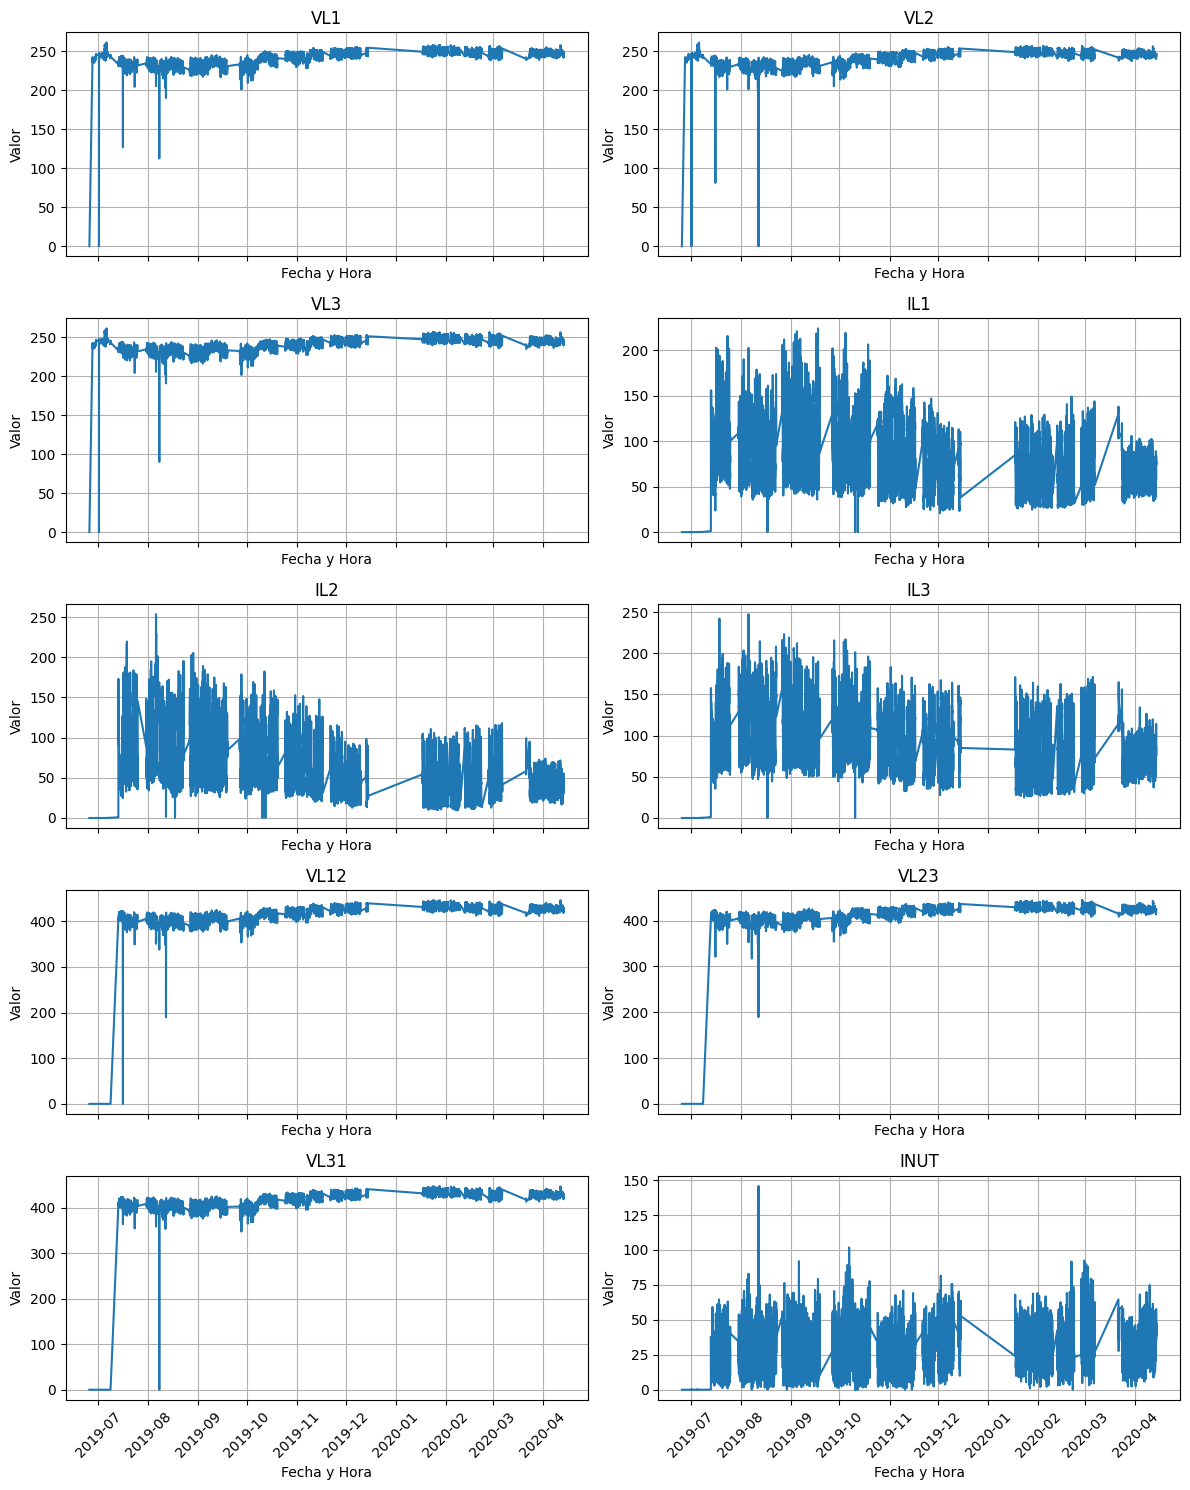

In [25]:


# 3. Seleccionar las columnas desde la 1 hasta la 10
columnas_a_graficar = df.columns[0:10]

# 4. Configurar la cuadrícula de subplots
num_columnas = 2  # Número de columnas en la cuadrícula de subplots
num_filas = 5     # Número de filas en la cuadrícula de subplots

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, 15), sharex=True)

# Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# 5. Graficar cada variable en su subplot correspondiente
for i, columna in enumerate(columnas_a_graficar):
    axes[i].plot(df.index, df[columna])
    axes[i].set_title(columna)
    axes[i].set_xlabel('Fecha y Hora')
    axes[i].set_ylabel('Valor')
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad

# Si hay subplots adicionales, eliminarlos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

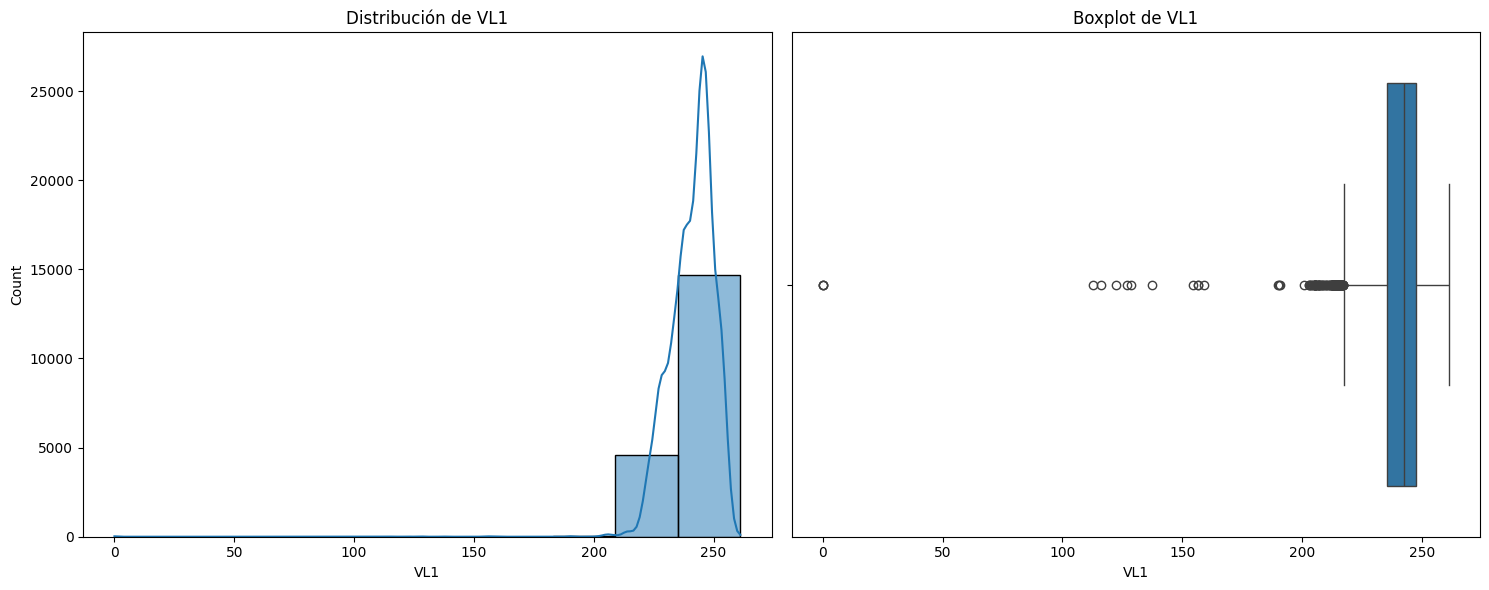

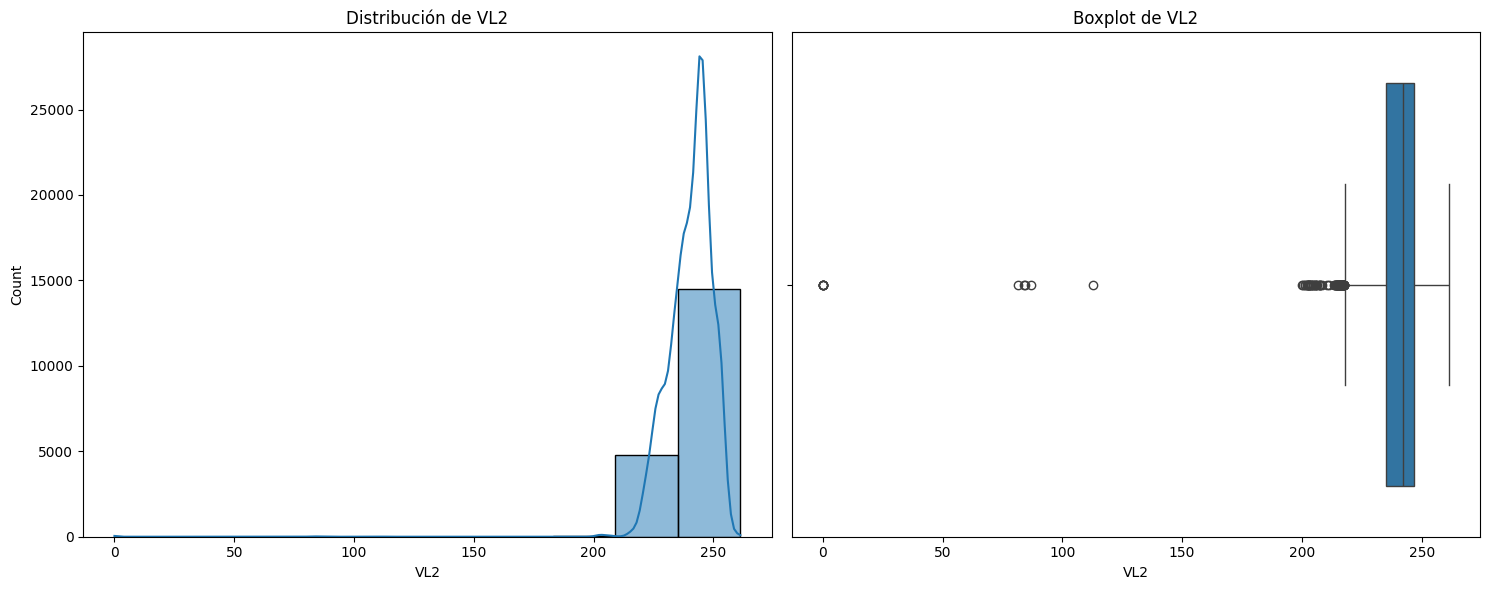

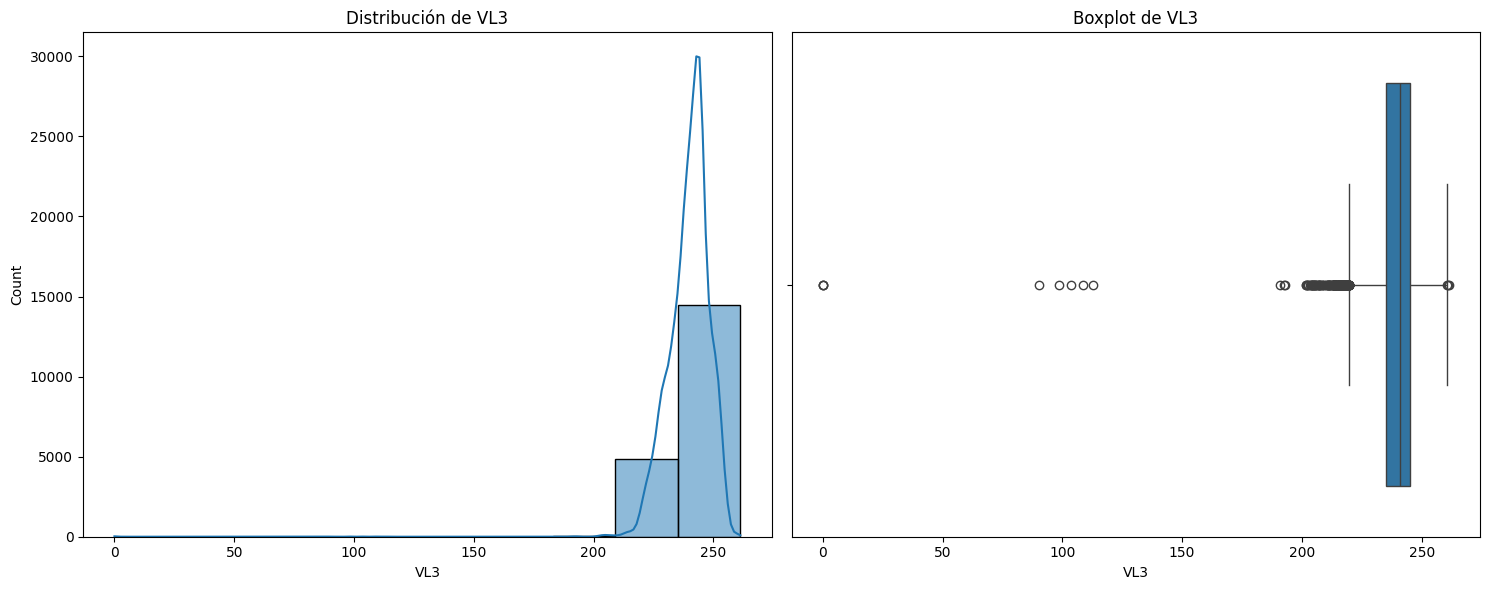

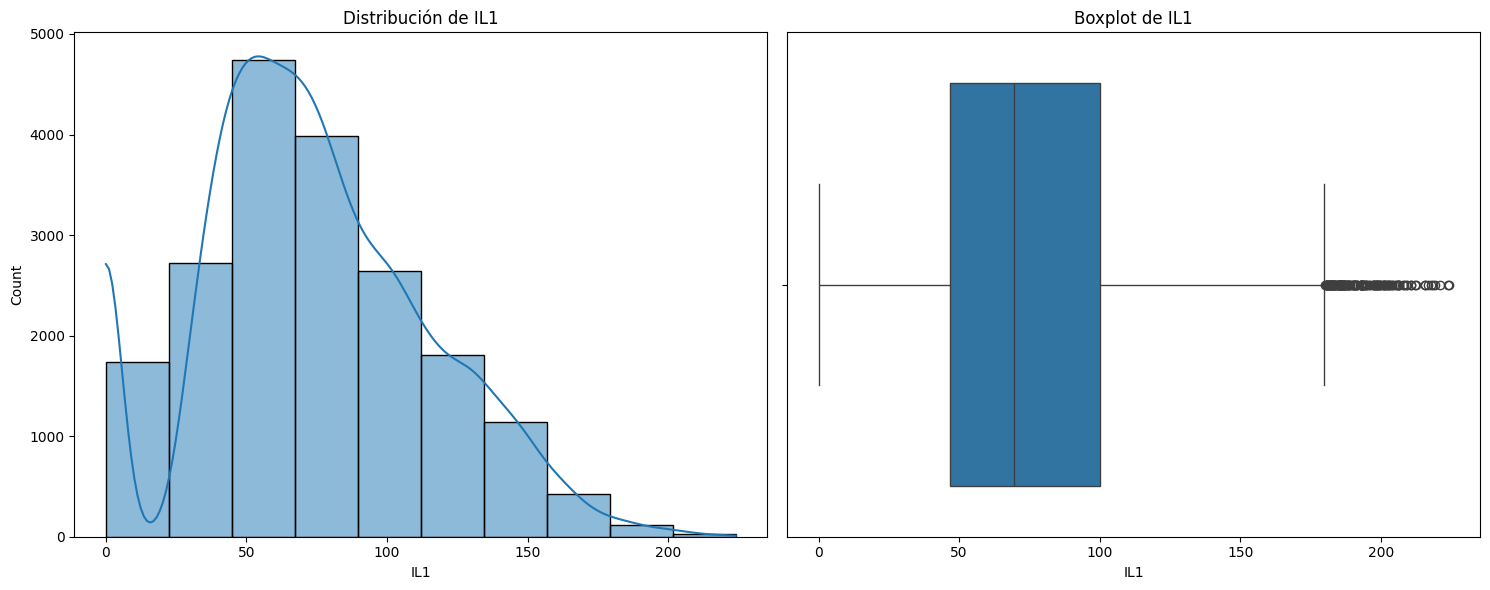

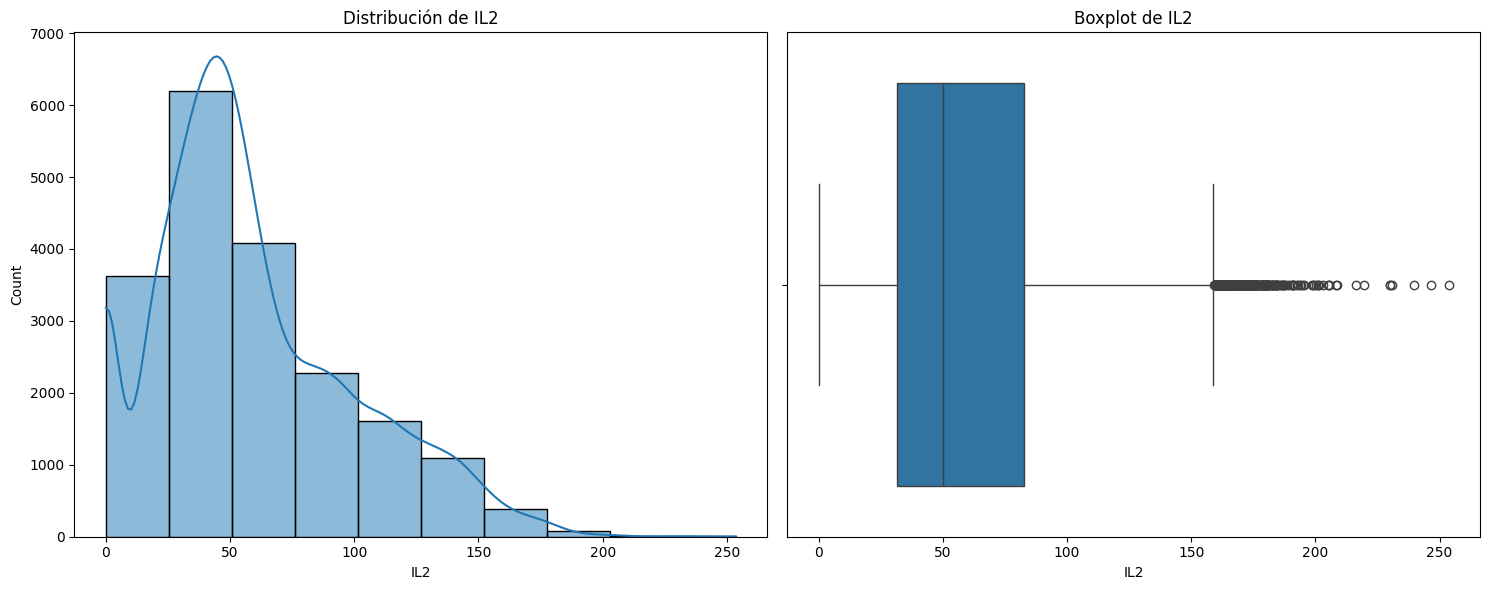

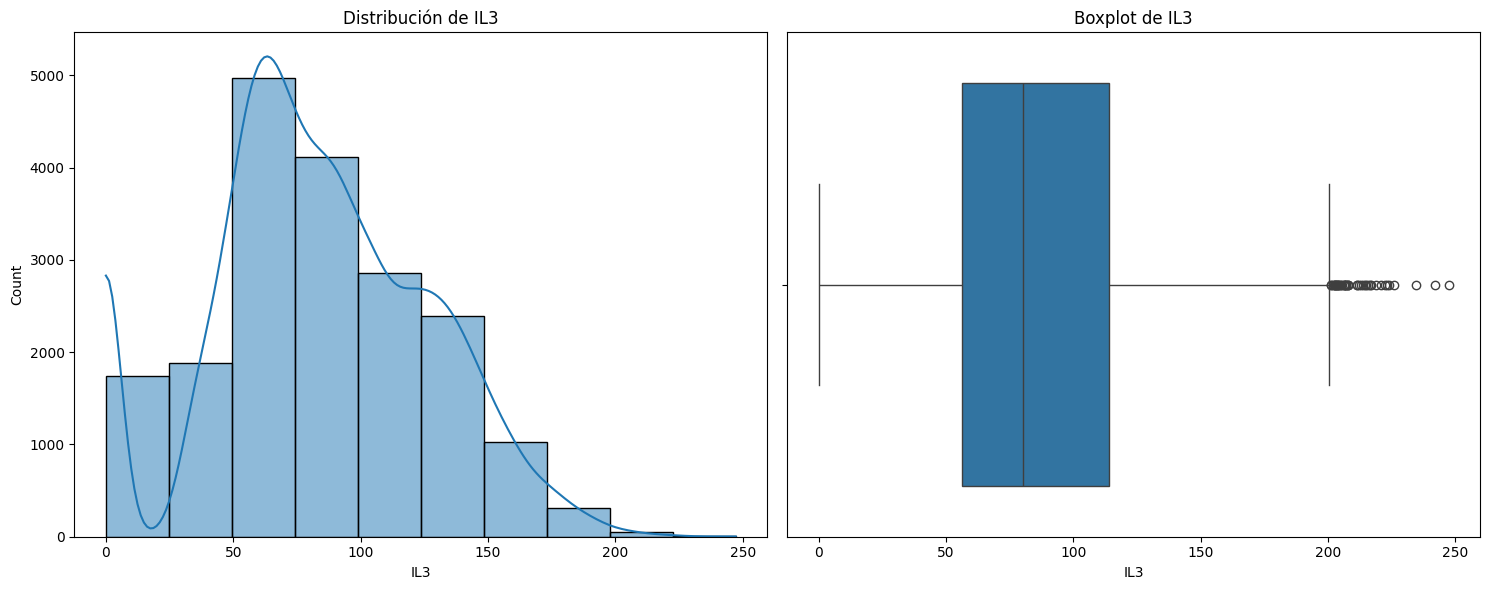

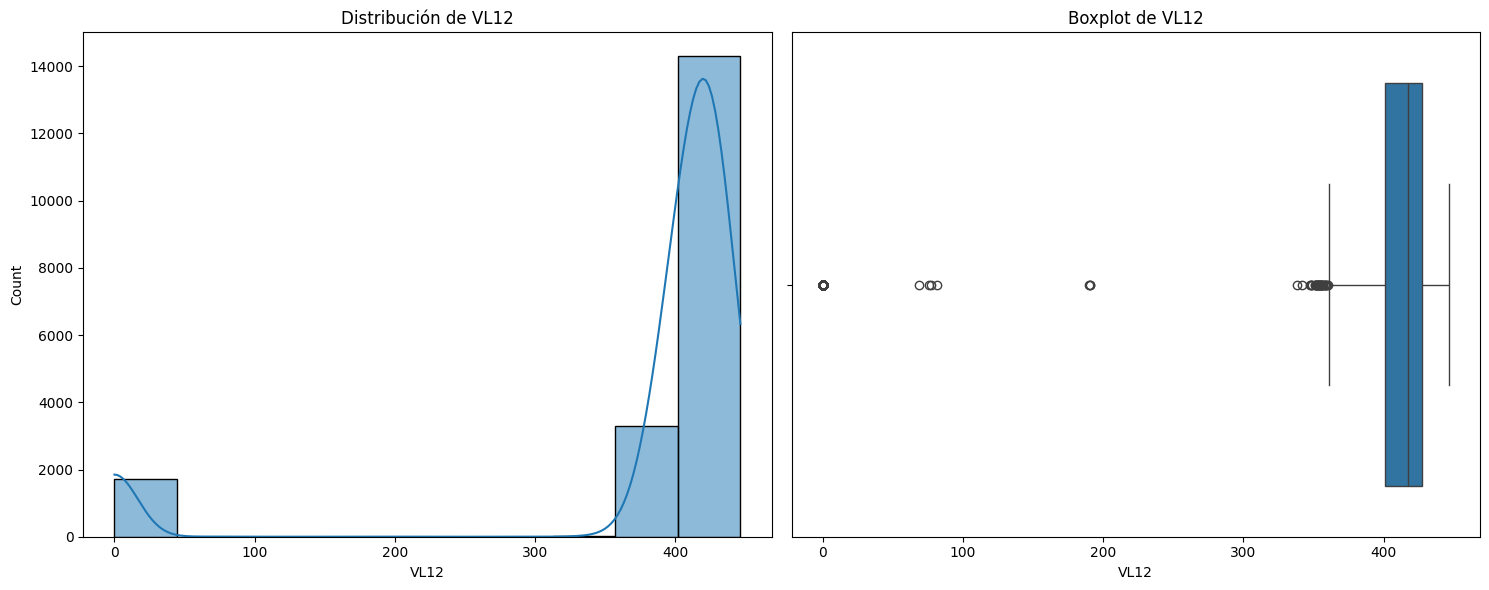

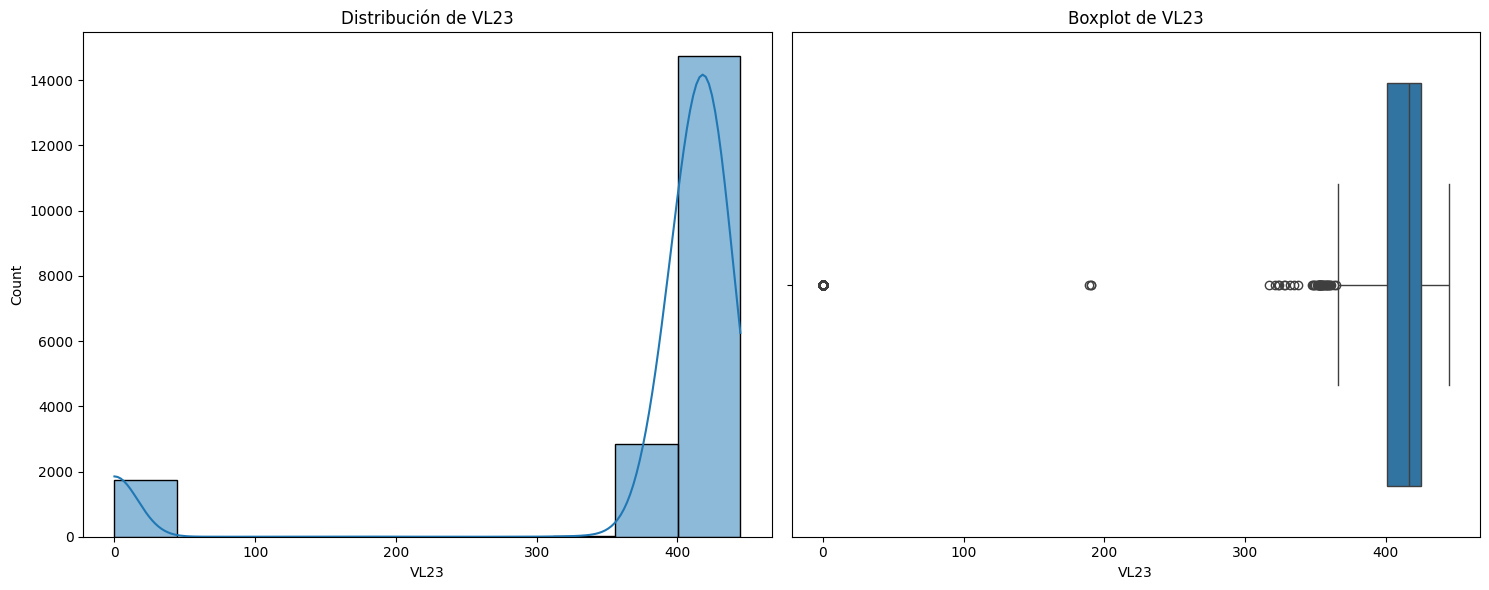

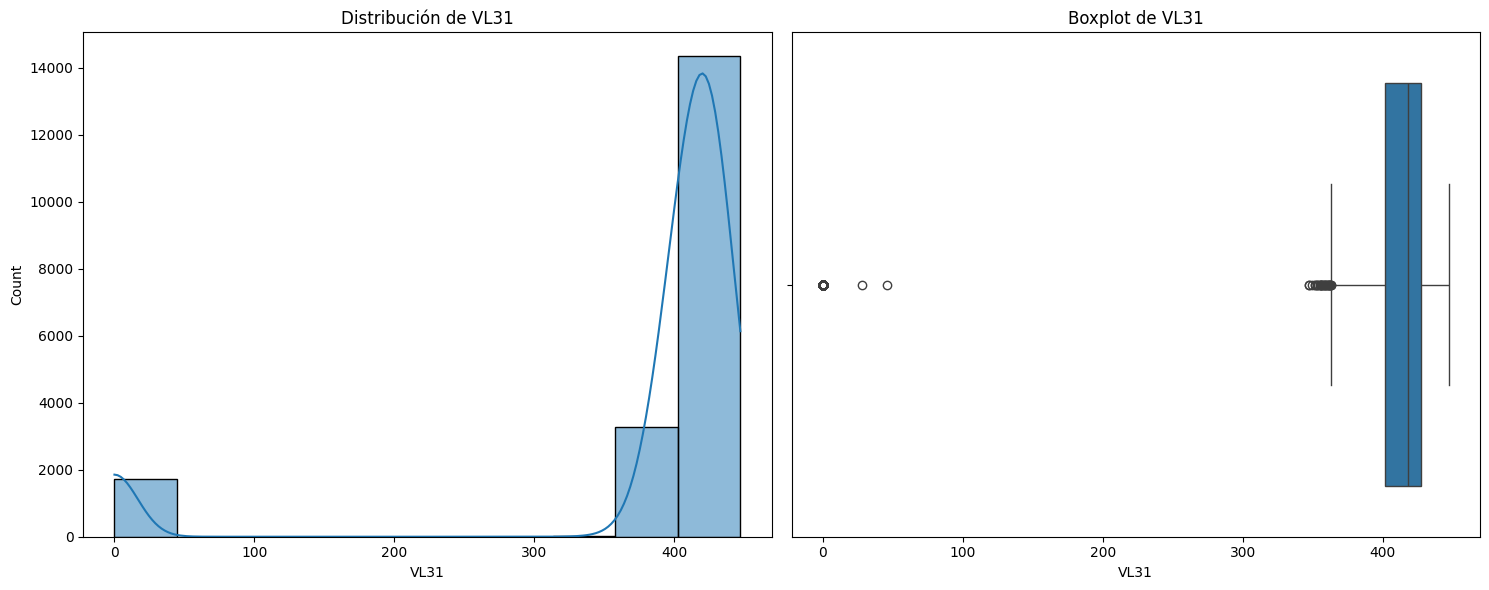

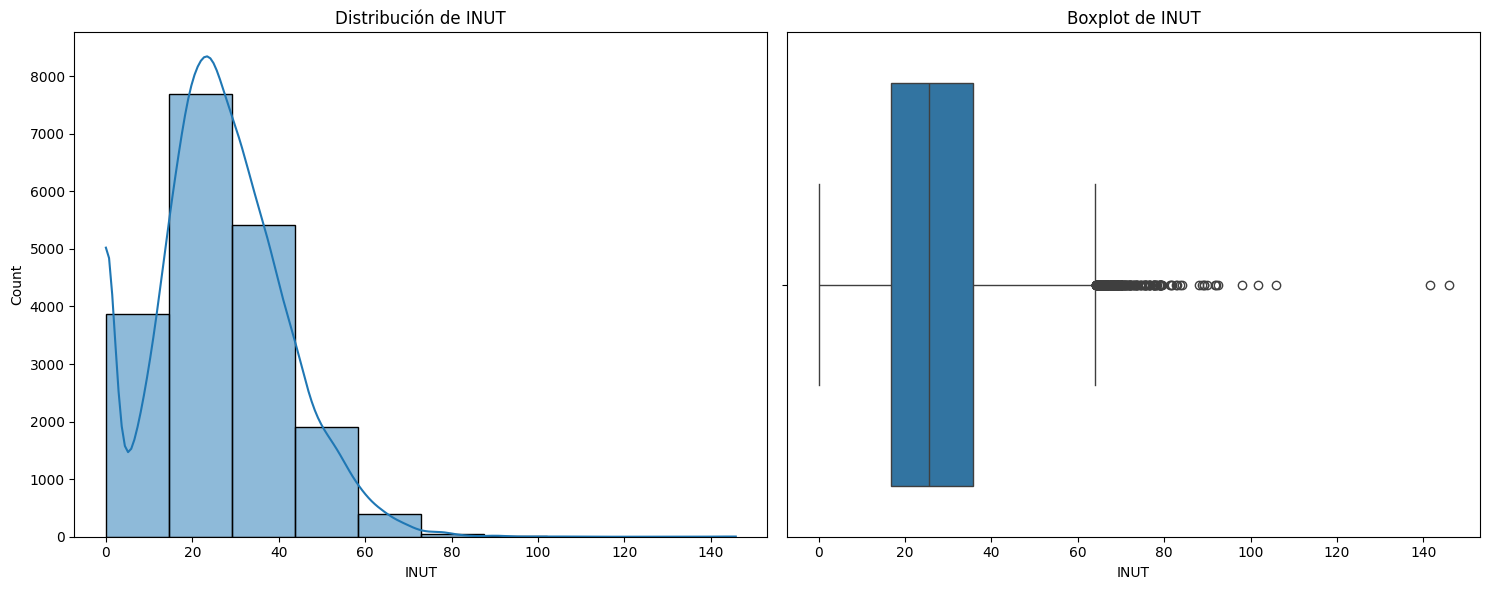

In [13]:
for col in df.select_dtypes(include=['number']).columns:
    # Crear una figura
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Histograma para la columna
    sns.histplot(df[col], kde=True, ax=axes[0], bins=10)
    axes[0].set_title(f'Distribución de {col}')

    # Boxplot para la columna
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot de {col}')

    # Mostrar los gráficos
    plt.tight_layout()
    plt.show()

    

#### Media móvil

In [70]:
# Vamos a aplicar la técnica de detección de anomalías de Media Móvil sobre la variable INUT

In [3]:
# Calcula la media móvil

In [4]:
# Define un umbral para detectar anomalías

In [ ]:
# Visualiza los resultados

#### Z-Score

In [68]:
# Vamos a aplicar la técnica de detección de anomalías Z-Score
# Pon aquí tu código

In [ ]:
# Define un umbral para detectar anomalías (por ejemplo, 3 desviaciones estándar)

In [ ]:
# Visualiza los resultados

#### Isolation Forest

In [57]:
# Vamos a aplicar la técnica de detección de anomalías de Isolation Forest, configura el parámetro contamination en 5%
# Pon aquí tu código

In [71]:
# Agrega las columnas de puntaje y si es dato anómalo o no en el dataframe

In [72]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales

In [73]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.

In [74]:
# Repite los pasos anteriores con el parámetro de contamination en 1%

## Local Outlier Factor

In [78]:
# Vamos a aplicar la técnica de detección de anomalías de Local Outlier Factor
# Pon aquí tu código

In [79]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales

In [80]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.

## Análisis

In [81]:
# Realiza un análisis detallado de los resultados obtenidos en cada una de las técnicas aplicadas. Utiliza gráficos o trablas para apoyar tu conclusiones

## Artículos de investigación

#### Artículo 1

In [82]:
# Coloca en este espacio el análisis del artículo 1

#### Artículo 2

In [83]:
# Coloca en este espacio el análisis del artículo 2